# Data analysis
## Import

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## Load data

In [3]:
df_load = pd.read_csv("./data/result.csv", sep=";")
df_load.head()

,Row,Column,Start,End,Max_time,Aggl_ratio,Aggl_size,Heuristic,Lenght_solution,Weight_solution,Execution_time(ms),Reconstruct_time(ms),Lenght_close,Lenght_open,Unnamed: 14
0,100,100,(61x29),(44x51),200,0.1,1,d_chess_king,23,29.041631,11.1161,0.0095,80,258,NaN
1,100,100,(61x29),(44x51),200,0.1,1,d_chebyshev,23,29.041631,766.6453,0.0134,1101,804,NaN
2,100,100,(61x29),(44x51),200,0.1,1,d_manhattan,23,29.041631,2.7282,0.0082,23,135,NaN
3,100,100,(61x29),(44x51),200,0.1,1,d_euclidean,23,29.041631,37.6839,0.0086,143,318,NaN
4,100,100,(95x28),(19x88),200,0.1,1,d_chess_king,77,100.852814,416.4882,0.0202,504,1528,NaN


### Clean and rename

In [4]:
df_result = df_load.iloc[:,0:-1]
map_name_col = {
    "Lenght_solution" : "Solution",
    "Weight_solution" : "Weight",
    "Execution_time(ms)" : "Time_exe",
    "Reconstruct_time(ms)" : "Time_rec",
    "Lenght_close" : "Close",
    "Lenght_open" : "Open"
}
df_result.rename(columns=map_name_col, inplace=True)
df_result.head()

,Row,Column,Start,End,Max_time,Aggl_ratio,Aggl_size,Heuristic,Solution,Weight,Time_exe,Time_rec,Close,Open
0,100,100,(61x29),(44x51),200,0.1,1,d_chess_king,23,29.041631,11.1161,0.0095,80,258
1,100,100,(61x29),(44x51),200,0.1,1,d_chebyshev,23,29.041631,766.6453,0.0134,1101,804
2,100,100,(61x29),(44x51),200,0.1,1,d_manhattan,23,29.041631,2.7282,0.0082,23,135
3,100,100,(61x29),(44x51),200,0.1,1,d_euclidean,23,29.041631,37.6839,0.0086,143,318
4,100,100,(95x28),(19x88),200,0.1,1,d_chess_king,77,100.852814,416.4882,0.0202,504,1528


In [5]:
df_filter = df_result[df_result["Solution"]>0]

In [6]:
heuristic = ["d_chess_king", "d_euclidean", "d_manhattan", "d_chebyshev"]
map_color = {"d_chess_king": "blue", "d_euclidean": "red", "d_manhattan": "black", "d_chebyshev": "green"}
colors = df_result["Heuristic"].map(map_color)

In [7]:
def scatter_heuristic(df, x_col, y_col,scale="", x_scale="linear", y_scale="linear"):
    figure = plt.figure(figsize=(18,10))
    gs = GridSpec(1,2, figure=figure, wspace=0.4)
    ax_left =figure.add_subplot(gs[0,0])
    gs_heuristic = gs[0,1].subgridspec(4,1)
    for i in range(0,len(heuristic)):
        heu = heuristic[i]
        df_heu = df[df["Heuristic"] == heu]
        ax = figure.add_subplot(gs_heuristic[i])
        ax.scatter(df_heu[x_col], df_heu[y_col], c=map_color[heu], s=8)
        ax.grid(True)
        if scale!="":
            ax.set_yscale(scale)
            ax.set_xscale(scale)
        else:
            ax.set_yscale(y_scale)
            ax.set_xscale(x_scale)
        ax.set_title(heu)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax_left.scatter(df_heu[x_col], df_heu[y_col], c=map_color[heu], s=8)
    ax_left.grid(True)
    ax_left.legend(map_color)
    ax_left.set_xlabel(x_col)
    ax_left.set_ylabel(y_col)
    if scale!="":
        ax_left.set_xscale(scale)
        ax_left.set_yscale(scale)
    else:
        ax_left.set_yscale(y_scale)
        ax_left.set_xscale(x_scale)

In [8]:
def plot_multiple_scatter(df, x_col, y_col):
    fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(10,8))
    min = df[x_col].min()
    max = df[x_col].max()
    delta = ( max - min ) / 4
    df_sub = df[df[x_col] <= min + delta]
    axis[0][0].scatter(df_sub[x_col], df_sub[y_col])
    df_sub = df[(df[x_col] > min + delta) & (df[x_col] <= min + 2*delta)]
    axis[0][1].scatter(df_sub[x_col], df_sub[y_col])
    df_sub = df[(df[x_col] > min + 2*delta) & (df[x_col] <= max - delta)]
    axis[1][0].scatter(df_sub[x_col], df_sub[y_col])
    df_sub = df[(df[x_col] > max -delta) & (df[x_col] <= max)]
    axis[1][1].scatter(df_sub[x_col], df_sub[y_col])


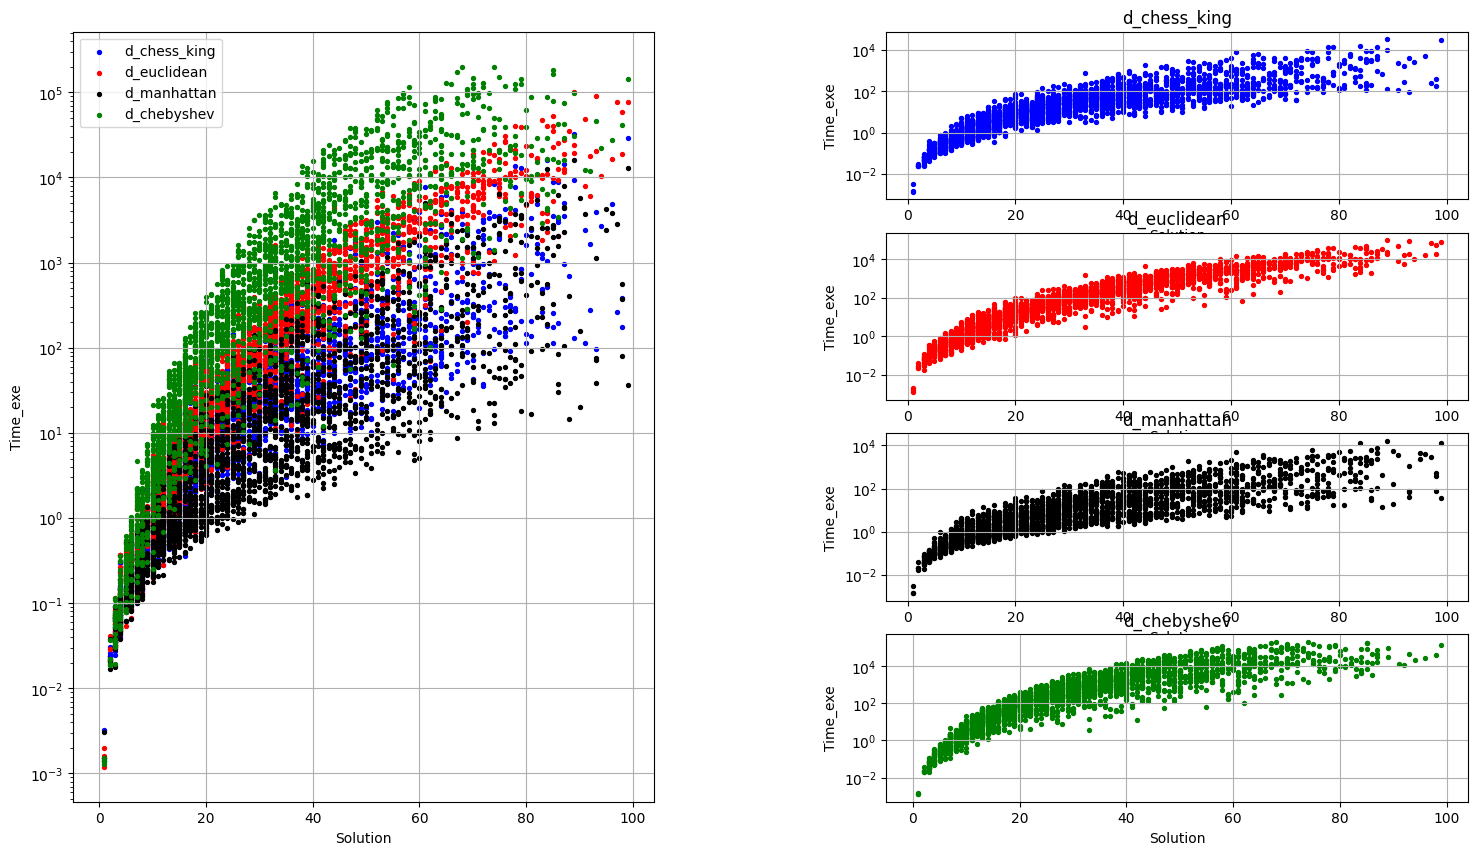

In [9]:
scatter_heuristic(df_result,"Solution", "Time_exe", y_scale="log")

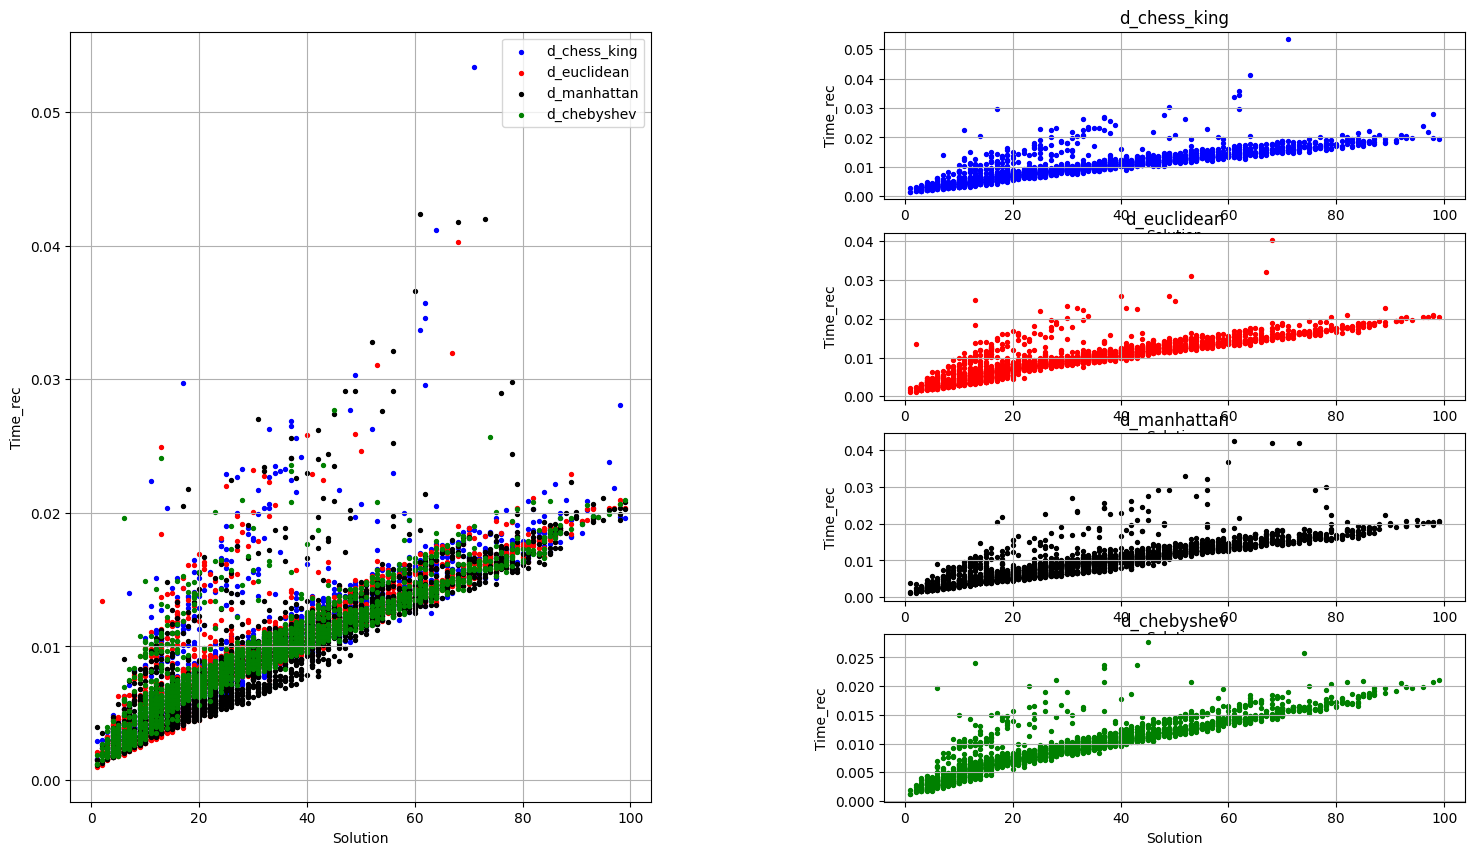

In [10]:
scatter_heuristic(df_filter, "Solution", "Time_rec")

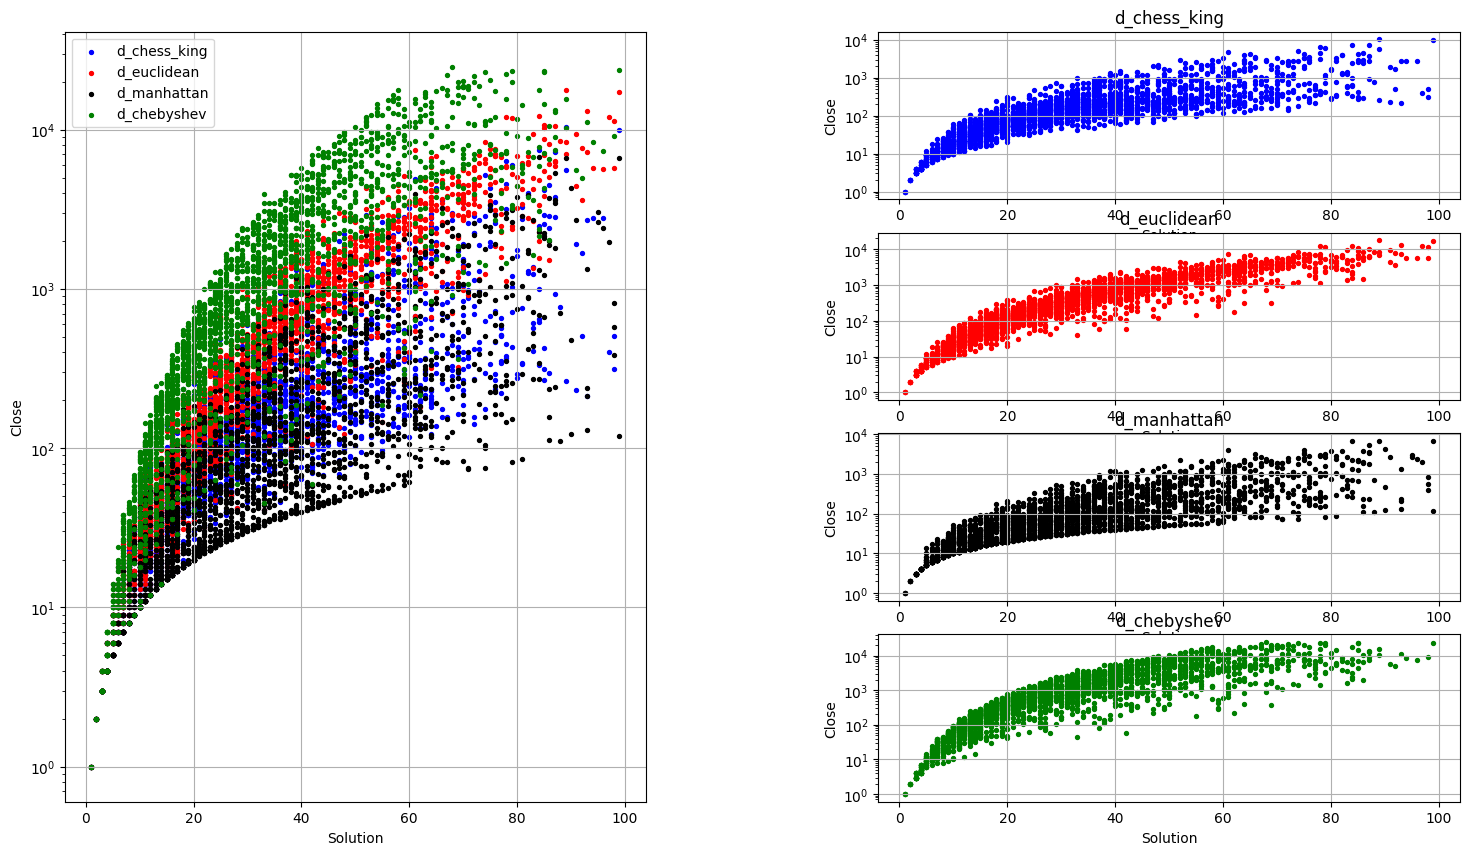

In [59]:
scatter_heuristic(df_filter, "Solution", "Close", y_scale="log")

In [12]:
df_result["Heuristic"].value_counts()

Heuristic
d_chess_king    2400
d_chebyshev     2400
d_manhattan     2400
d_euclidean     2400
Name: count, dtype: int64

In [49]:
df_combined = df_result[df_result["Heuristic"]==heuristic[0]]
fields = ["Solution", "Weight", "Time_exe", "Close", "Open"]
#df_combined["Time_exe"] = df_combined["Time_exe"]/df_combined["Solution"]
#df_combined["Time_rec"] = df_combined["Time_rec"]/df_combined["Solution"]
#df_combined["Close"] = df_combined["Close"]/df_combined["Solution"]
#df_combined["Open"] = df_combined["Open"]/df_combined["Solution"]


for i in range(1, len(heuristic)):
    df_extract = df_result[(df_result["Heuristic"] == heuristic[i]) & (df_result["Solution"]>0)].drop(columns=["Heuristic", "Max_time"])
    #df_extract["Time_exe"] = df_extract["Time_exe"]/df_extract["Solution"]
    #df_extract["Time_rec"] = df_extract["Time_rec"]/df_extract["Solution"]
    #df_extract["Close"] = df_extract["Close"]/df_extract["Solution"]
    #df_extract["Open"] = df_extract["Open"]/df_extract["Solution"]

    df_combined = pd.merge(df_combined, df_extract, on=["Row", "Column", "Start", "End", "Aggl_ratio", "Aggl_size"], suffixes=["", "_"+heuristic[i]])

df_combined.iloc[:, 8:-1]

,Solution,Weight,Time_exe,Time_rec,Close,Open,Solution_d_euclidean,Weight_d_euclidean,Time_exe_d_euclidean,Time_rec_d_euclidean,...,Weight_d_manhattan,Time_exe_d_manhattan,Time_rec_d_manhattan,Close_d_manhattan,Open_d_manhattan,Solution_d_chebyshev,Weight_d_chebyshev,Time_exe_d_chebyshev,Time_rec_d_chebyshev,Close_d_chebyshev
0,23,29.041631,11.1161,0.0095,80,258,23,29.041631,37.6839,0.0086,...,29.041631,2.7282,0.0082,23,135,23,29.041631,766.6453,0.0134,1101
1,56,59.142136,71.0735,0.0129,212,670,56,59.142136,1308.4269,0.0147,...,59.970563,73.7733,0.0134,197,625,56,59.142136,4843.8178,0.0133,2549
2,63,65.727922,91.8272,0.0160,216,708,63,65.727922,1066.5731,0.0168,...,67.384776,156.1491,0.0144,327,811,63,65.727922,4025.6649,0.0143,2143
3,54,69.154329,108.0262,0.0157,257,773,54,69.154329,2966.8136,0.0130,...,69.740115,15.4698,0.0133,59,346,54,69.154329,73030.1181,0.0135,13765
4,47,58.012193,83.3258,0.0122,226,671,47,58.012193,2447.9679,0.0114,...,58.012193,5.8701,0.0112,47,290,47,58.012193,29796.8383,0.0115,8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,49,52.970563,332.7139,0.0121,831,731,49,52.970563,803.9032,0.0116,...,52.970563,259.8253,0.0119,728,737,49,52.970563,1646.5920,0.0118,1947
2366,42,49.284271,125.9368,0.0110,457,616,42,49.284271,691.2878,0.0102,...,50.941125,23.5312,0.0240,124,261,42,49.284271,4071.3087,0.0106,3760
2367,56,66.597980,105.1108,0.0130,342,657,56,66.597980,1629.7469,0.0124,...,69.426407,48.3911,0.0129,271,449,56,66.597980,18320.1682,0.0126,8260
2368,70,77.698485,1098.9630,0.0152,1550,1164,70,77.698485,4187.2425,0.0147,...,78.526912,548.4198,0.0143,1073,987,70,77.698485,12748.6597,0.0148,6059


In [50]:
df_ratio_combined = df_combined
df_ratio_combined["Time_exe_d_euclidean"] = df_ratio_combined["Time_exe_d_euclidean"] / df_ratio_combined["Time_exe"]
df_ratio_combined["Time_rec_d_euclidean"] = df_ratio_combined["Time_rec_d_euclidean"] / df_ratio_combined["Time_rec"]
df_ratio_combined["Close_d_euclidean"] = df_ratio_combined["Close_d_euclidean"] / df_ratio_combined["Close"]
df_ratio_combined["Open_d_euclidean"] = df_ratio_combined["Open_d_euclidean"] / df_ratio_combined["Open"]
df_ratio_combined["Time_exe_d_manhattan"] = df_ratio_combined["Time_exe_d_manhattan"] / df_ratio_combined["Time_exe"]
df_ratio_combined["Time_rec_d_manhattan"] = df_ratio_combined["Time_rec_d_manhattan"] / df_ratio_combined["Time_rec"]
df_ratio_combined["Close_d_manhattan"] = df_ratio_combined["Close_d_manhattan"] / df_ratio_combined["Close"]
df_ratio_combined["Open_d_manhattan"] = df_ratio_combined["Open_d_manhattan"] / df_ratio_combined["Open"]
df_ratio_combined["Time_exe_d_chebyshev"] = df_ratio_combined["Time_exe_d_chebyshev"] / df_ratio_combined["Time_exe"]
df_ratio_combined["Time_rec_d_chebyshev"] = df_ratio_combined["Time_rec_d_chebyshev"] / df_ratio_combined["Time_rec"]
df_ratio_combined["Close_d_chebyshev"] = df_ratio_combined["Close_d_chebyshev"] / df_ratio_combined["Close"]
df_ratio_combined["Open_d_chebyshev"] = df_ratio_combined["Open_d_chebyshev"] / df_ratio_combined["Open"]

In [55]:
def plot_multiple_ratio_scatter(df, heuristic):
    fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(10,8))
    axis[0][0].scatter(df["Solution"], df["Time_exe_"+heuristic], s=8)
    axis[0][0].set_yscale("log")
    axis[0][0].set_title("Time_exe")
    axis[0][0].grid(True)
    axis[0][1].scatter(df["Solution"], df["Time_rec_"+heuristic], s=8)
    axis[0][1].set_yscale("log")
    axis[0][1].set_title("Time_rec")
    axis[0][1].grid(True)
    axis[1][0].scatter(df["Solution"], df["Close_"+heuristic], s=8)
    axis[1][0].set_yscale("log")
    axis[1][0].set_title("Close")
    axis[1][0].grid(True)
    axis[1][1].scatter(df["Solution"], df["Open_"+heuristic], s=8)
    axis[1][1].set_yscale("log")
    axis[1][1].set_title("Open")
    axis[1][1].grid(True)

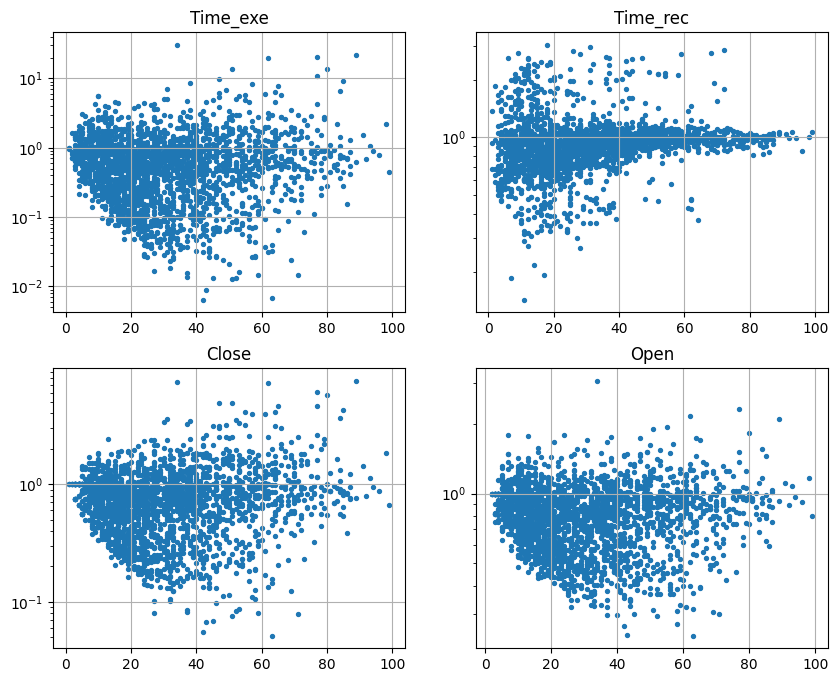

In [ ]:
plot_multiple_ratio_scatter(df_ratio_combined, "d_manhattan")


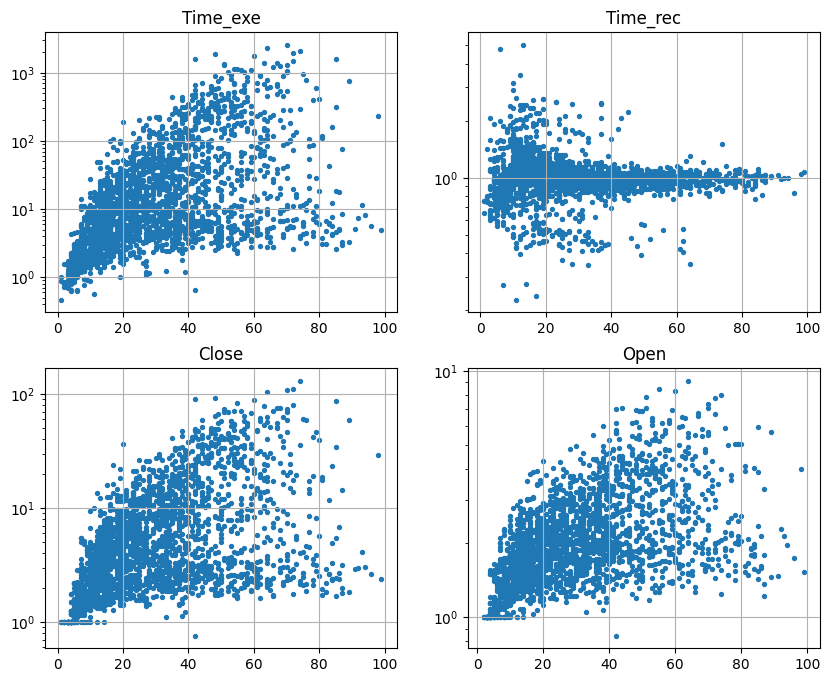

In [57]:
plot_multiple_ratio_scatter(df_ratio_combined, "d_chebyshev")

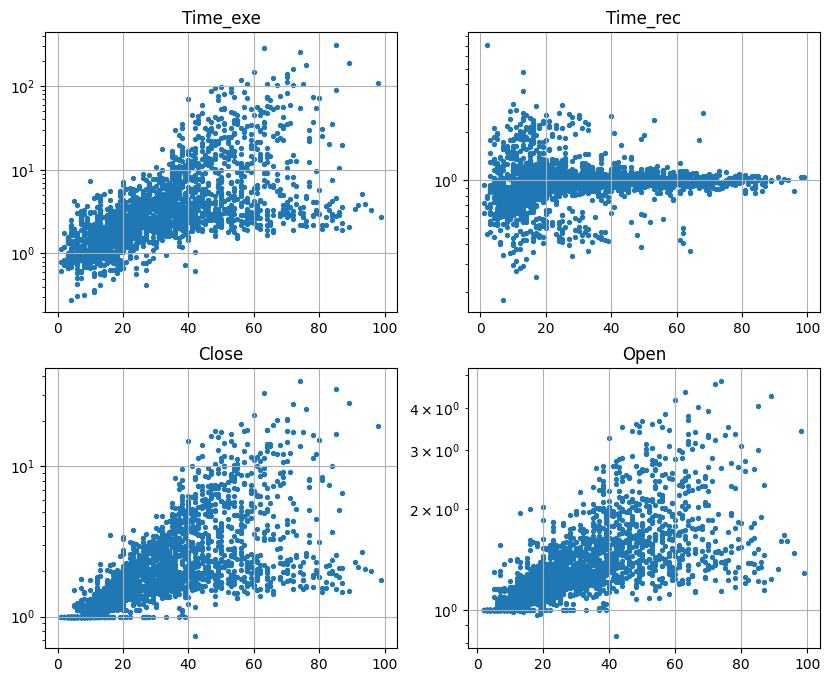

In [58]:
plot_multiple_ratio_scatter(df_ratio_combined, "d_euclidean")

In [98]:

def plot_multiple_compare_bar(df, heuristic):
    fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(10,8))
    df_compare_exe = (df["Time_exe_"+heuristic] > 1).value_counts()
    df_compare_exe.plot(kind="bar", ax=axis[0][0])
    axis[0][0].set_title("Time_exe")
    df_compare_rec = (df["Time_rec_"+heuristic] > 1).value_counts()
    df_compare_rec.plot(kind="bar", ax=axis[0][1])
    axis[0][1].set_title("Time_rec")
    df_compare_close = (df["Close_"+heuristic] > 1).value_counts()
    df_compare_close.plot(kind="bar", ax=axis[1][0])
    axis[1][0].set_title("Close")
    df_compare_open = (df["Open_"+heuristic] > 1).value_counts()
    df_compare_open.plot(kind="bar", ax=axis[1][1])
    axis[1][1].set_title("Open")

Has ```d_chess_king``` better perfomance than ```d_manhattan```?

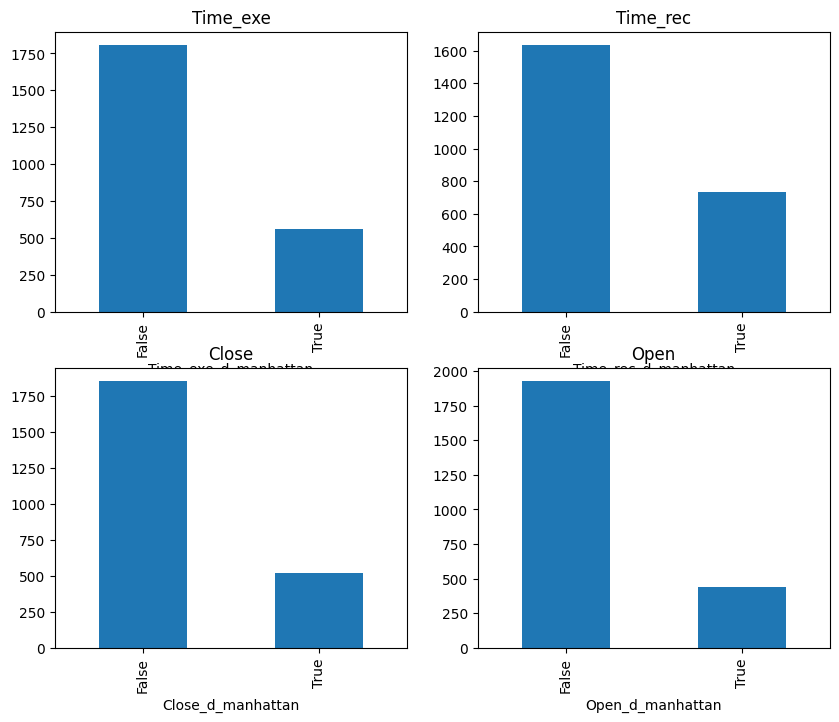

In [99]:
plot_multiple_compare_bar(df_ratio_combined, "d_manhattan")

Has ```d_chess_king``` better perfomance than ```d_chebyshev```?

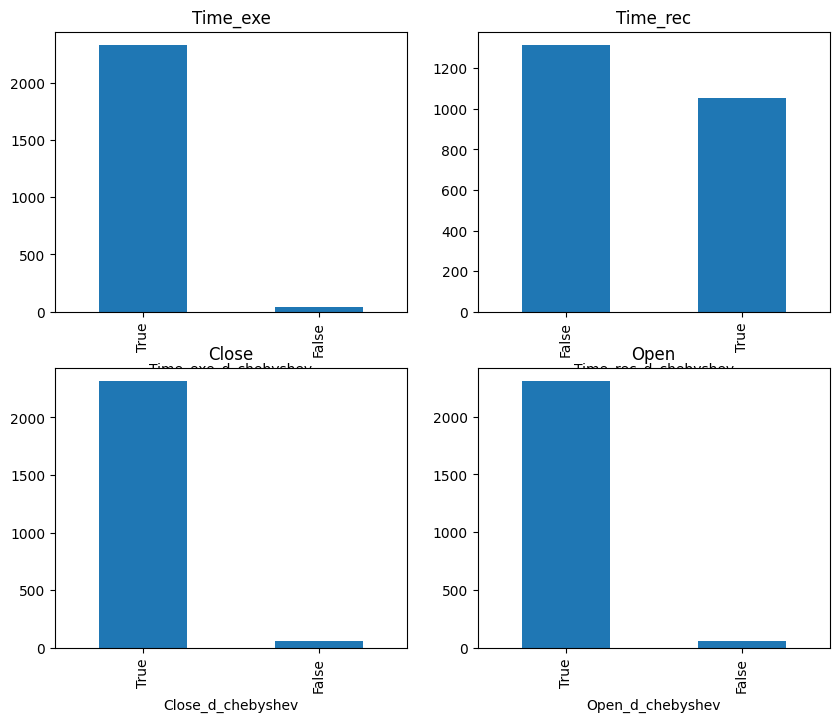

In [101]:
plot_multiple_compare_bar(df_ratio_combined,"d_chebyshev")

Has ```d_chess_king``` better perfomance than ```d_euclidean```?

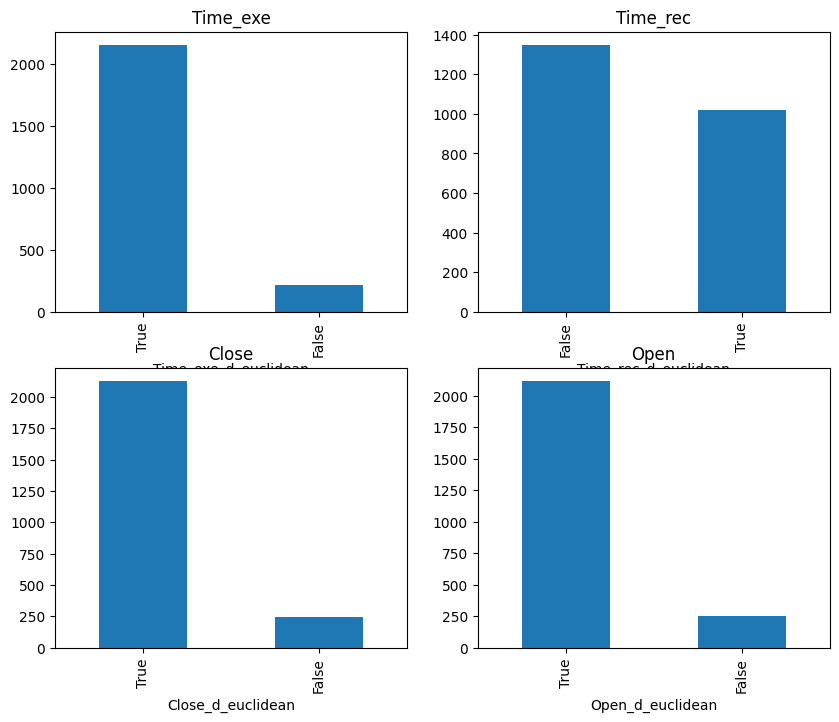

In [102]:
plot_multiple_compare_bar(df_ratio_combined, "d_euclidean")